Метод опорных векторов cvm. Задачи классификации.

У нас есть данные экспериментов лечения больных мышей двумя видами лексрств. 

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_csv(r"C:\Users\mmd28\OneDrive\Рабочий стол\Academic potfolio\Classical Machine Learning\Supervised learning\Classification\data\mouse_viral_study.csv")

In [41]:
df.head(3)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

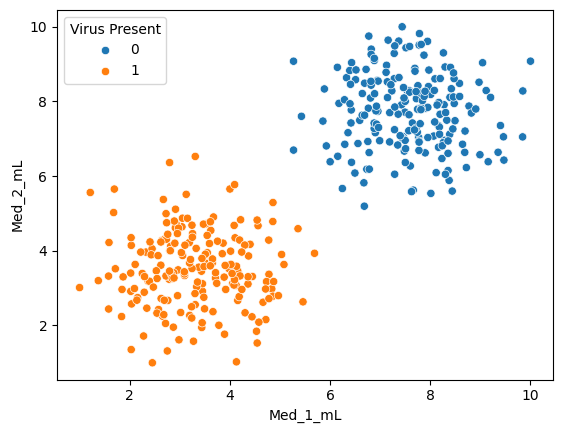

In [42]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

Построим разделяющую линию и график прямой

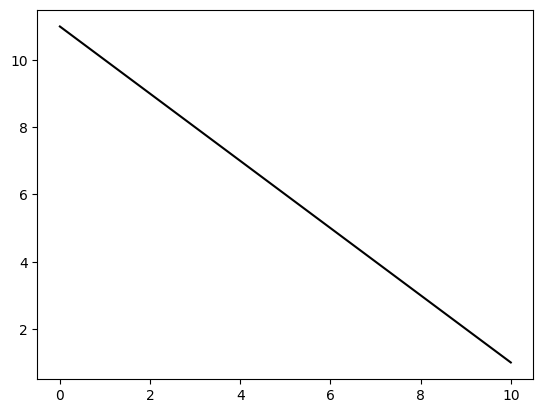

In [43]:
# Построим разделяющую линию 
x = np.linspace(0, 10, 100)

# Найдем значения коэффициентов
m = -1
b = 11

# построим график прямой
y = m*x + b

# Построим график
plt.plot(x, y, 'black')

Приблизим разделяющую линию к одному из кластеров точек (m)

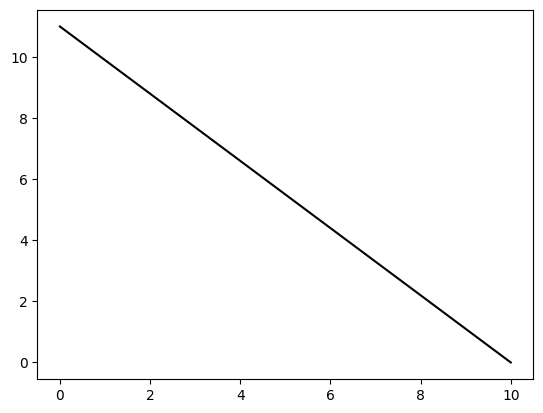

In [44]:
# Построим разделяющую линию 
X = np.linspace(0, 10, 100)

# Найдем значения коэффициентов
m = -1.1
b = 11

# построим график прямой
y = m*x + b

# Построим график
plt.plot(x, y, 'black')

Найдем такую разделяющую линию при помощи метода опорных векторов

In [45]:
from sklearn.svm import SVC  # классификатор

Посмотрим как работает метод. Для него обязательно требуется проводить масштабирование, но не сейчас. **Далее только ознакомительная часть.**

In [46]:
X = df.drop('Virus Present', axis=1)
y= df['Virus Present']

Выберем линейное ядро kernel = linear

In [47]:
model = SVC(kernel = 'linear', C=1000)

In [48]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

Напишем функцию, которая строит график скаттерплот, нарисует разделяющую линию, а также зазоры и вектора #Нужно закончить функцию.

In [49]:
def plot_svm_boundary(model, X, y):
    X = X.values
    y = y.values

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='seismic')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


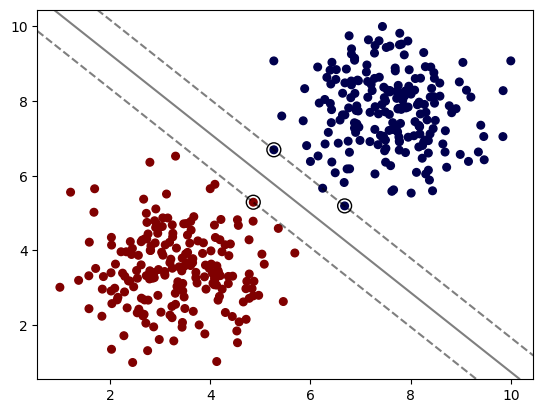

In [50]:
plot_svm_boundary(model, X, y)

Изменим значение "С"

In [51]:
model = SVC(kernel = 'linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


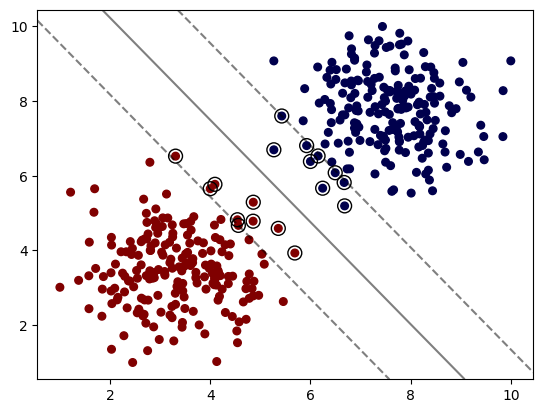

In [52]:
plot_svm_boundary(model, X, y)

In [53]:
model = SVC(kernel = 'linear', C=0.005)
model.fit(X, y)

SVC(C=0.005, kernel='linear')

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


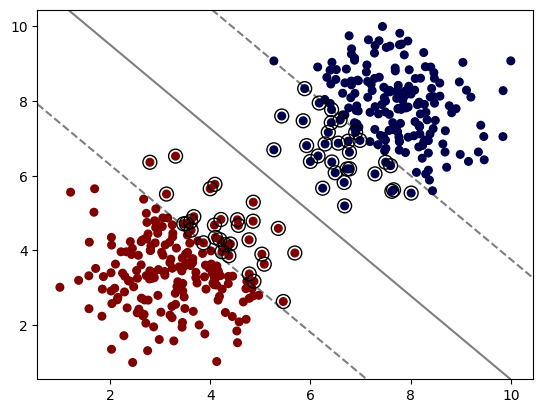

In [54]:
plot_svm_boundary(model, X, y)

Мы видим, что чем меньше значение "С", тем шире гранеицы зазора и тем больше неопределенных точек внутри зазора. Эти точки на границах зазора являются опорными векторами и внутри зазора их быть не должно. 

Выберем ядро радиальной базисной функции kernel = rbf. Проекция в пространстве большей размерности

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


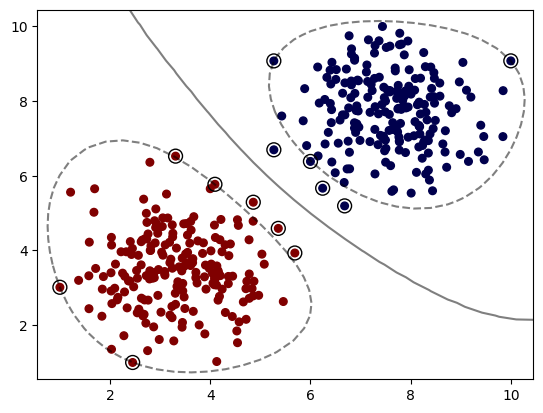

In [55]:
model = SVC(kernel = 'rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


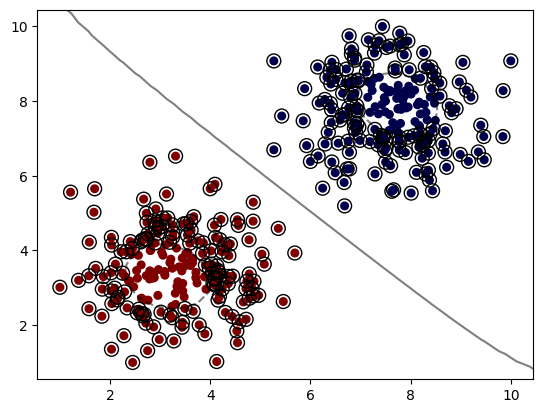

In [56]:
model = SVC(kernel = 'rbf', C=0.01)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


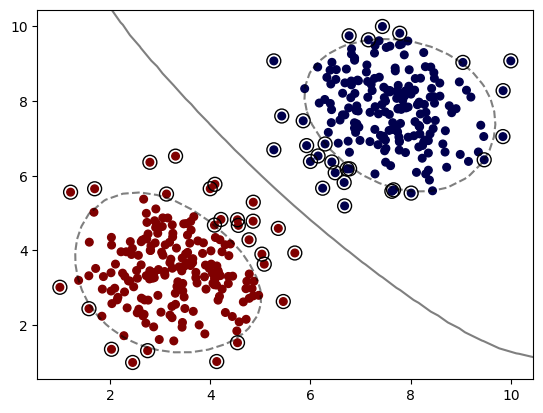

In [57]:
model = SVC(kernel = 'rbf', C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

Посмтотрим на параметр Gamma

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


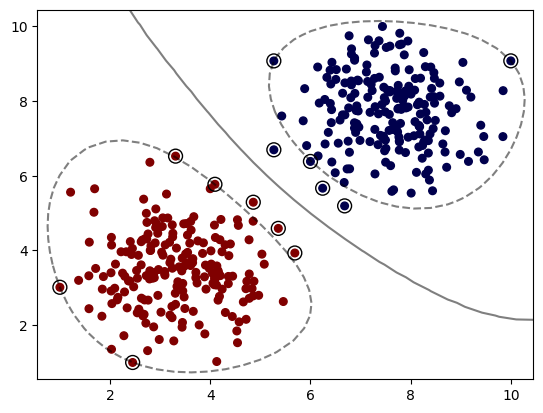

In [58]:
model = SVC(kernel = 'rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


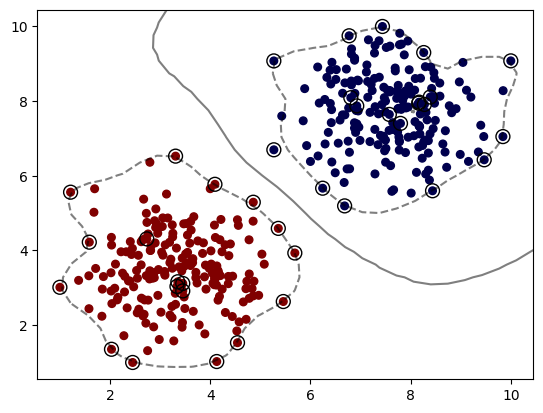

In [59]:
model = SVC(kernel = 'rbf', C=1, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


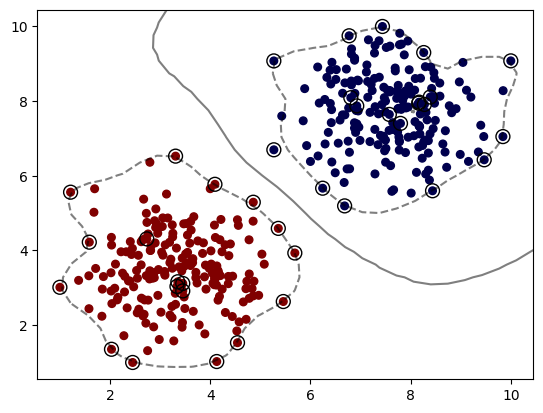

In [60]:
model = SVC(kernel = 'rbf', C=1, gamma=0.5)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


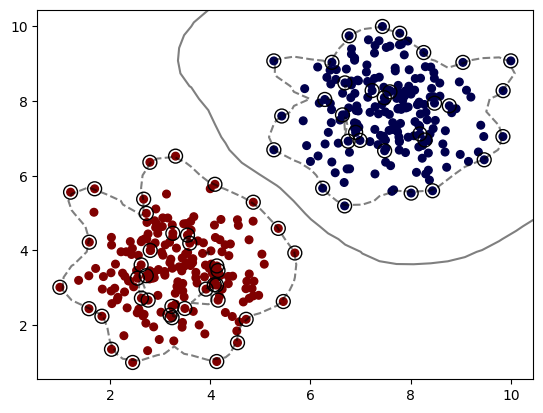

In [61]:
model = SVC(kernel = 'rbf', C=1, gamma=0.9)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


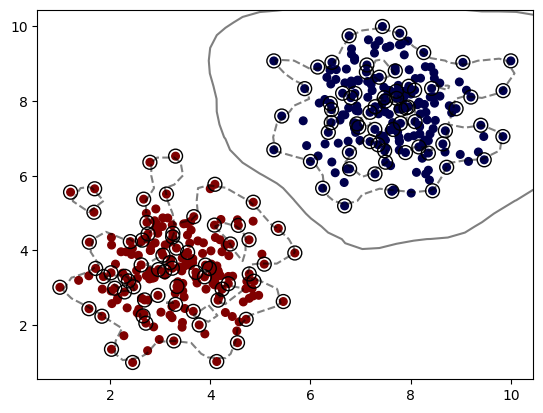

In [62]:
model = SVC(kernel = 'rbf', C=1, gamma=2) 
model.fit(X, y)
plot_svm_boundary(model, X, y)

Для наших данных наилучшее значение gamma - это scale. Там, где gamma = 2 - это переобученная модель

Выберем ядро сигмоид kernel = sigmoid. 

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


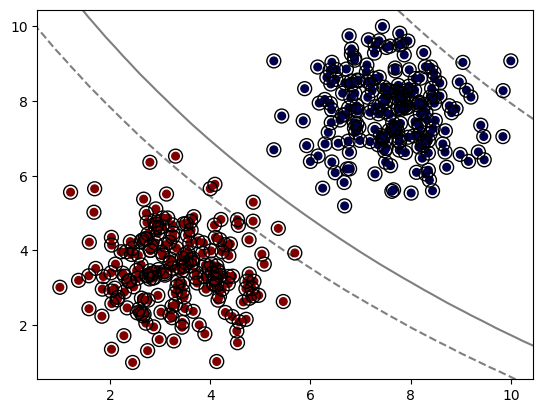

In [63]:
model = SVC(kernel = 'sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

Выберем полиномиальное ядро  kernel = poly. Степень полинома - degree

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


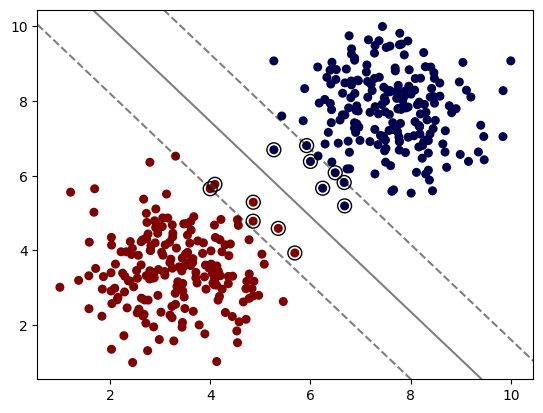

In [64]:
model = SVC(kernel = 'poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


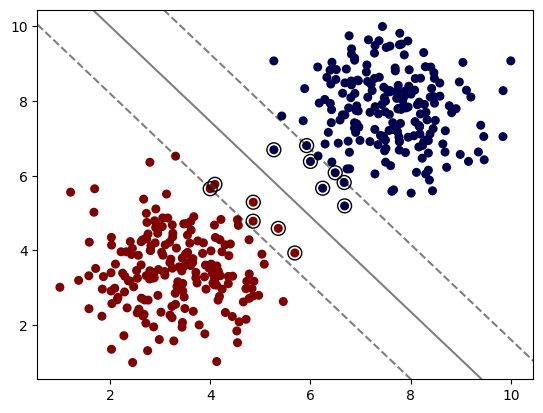

In [65]:
model = SVC(kernel = 'poly', degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


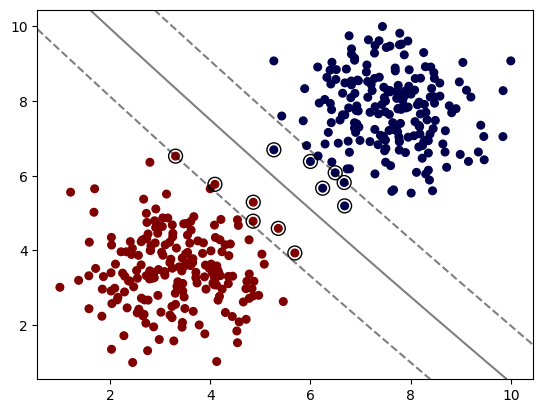

In [66]:
model = SVC(kernel = 'poly', C=0.05, degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

c:\Users\mmd28\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


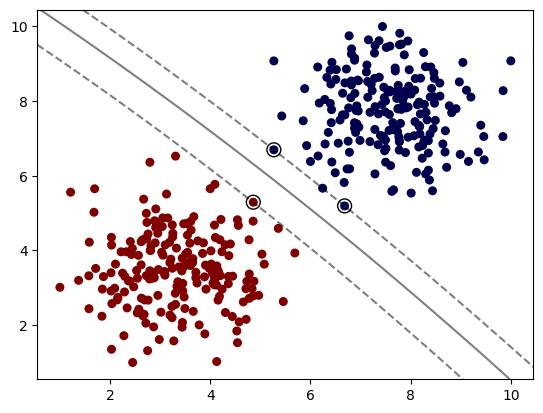

In [67]:
model = SVC(kernel = 'poly', C=0.05, degree=4)
model.fit(X, y)
plot_svm_boundary(model, X, y)

Посик по сетке

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
svm = SVC()

In [70]:
paraqm_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [72]:
grid = GridSearchCV(svm, paraqm_grid)

In [73]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [74]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}